In [22]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#imprting Dataset-
path =  "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(path)

In [24]:
#printing first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
df.shape

(25, 2)

In [26]:
#data description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [27]:
#data correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# due to this correlation scores we indicate that we have a positive linear relationship between scores and hours


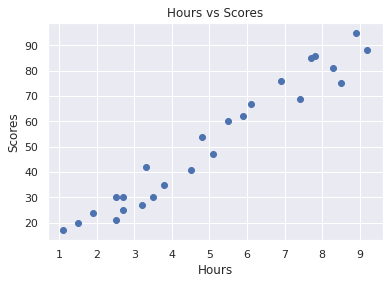

In [28]:
sns.set()
plt.plot(df.Hours, df.Scores, linestyle='none', marker='o')
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.title('Hours vs Scores')
plt.show()

In [29]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [30]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [31]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [32]:
#importing train_test_split and split the data to 80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [33]:
#we will use linear regression algorithm
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [34]:
#fitting the training data
linreg.fit(X_train,Y_train)

LinearRegression()

In [35]:
#regression line formula
Y0 = linreg.intercept_ + linreg.coef_*X_train

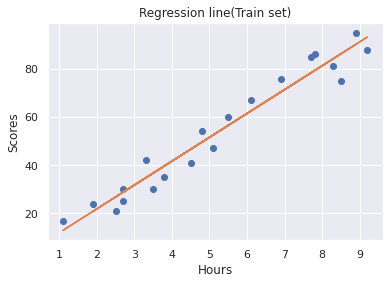

In [36]:
#plotting on train data
sns.set()
plt.plot(X_train,Y_train, marker='o', linestyle='none')
plt.plot(X_train,Y0, linestyle='-')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line(Train set)")
plt.show()

In [38]:
#predicting the Scores for test data
Y_pred=linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [39]:
print(Y_test)

[20 27 69 30 62]


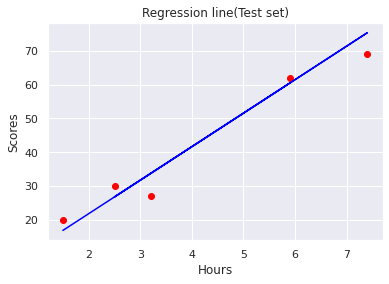

In [40]:
#plotting line on test data
sns.set()
plt.plot(X_test, Y_pred, color='blue')
plt.scatter(X_test, Y_test, color='red', marker='o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line(Test set)")
plt.show()

In [41]:
#comparing actual by predicted
Y_test_list = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test_list,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [42]:
#importing r squared metrics to measure the accuracy of our model
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

In [43]:
#importing the MSE and MAE to predict the error
from sklearn.metrics import mean_squared_error,mean_absolute_error

MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


In [44]:
#prdicting the score for a given hours
predicted_score = linreg.predict([[9.25]])
print("predicted score for a student studying for 9.25 hours :",predicted_score)

predicted score for a student studying for 9.25 hours : [93.69173249]


# Conclusion
### If the student studied for 9.25 hours he/she may get 93.69173249 as a score results